3.2.6

## Challenge: If a tree falls in the forest...
Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

## Import libraries and dataset

In [24]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('student-mat.csv')
stdnt = pd.DataFrame(data)

In [3]:
stdnt.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## from meta data:

- school- Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex- Student's sex (binary: 'F' - female or 'M' - male) 
- age- Student's age (numeric: from 15 to 22)
- address- Student's home address type 'U' - urban or 'R' - rural
- famsize- Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus- Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart
- Medu- Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
- Fedu- Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
- Mjob- Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob- Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason- Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian- Student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime- Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime- Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures- Number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup- Extra educational support (binary: yes or no)
- famsup- Family educational support (binary: yes or no)
- paid- Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities- Extra-curricular activities (binary: yes or no)
- nursery- Attended nursery school (binary: yes or no)
- higher- Wants to take higher education (binary: yes or no)
- internet- Internet access at home (binary: yes or no)
- romantic- With a romantic relationship (binary: yes or no)
- famrel- Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime- Free time after school (numeric: from 1 - very low to 5 - very high)
- goout- Going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc- Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc- Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health- Current health status (numeric: from 1 - very bad to 5 - very good)
- absences- Number of school absences (numeric: from 0 to 93)
- G1- First period grade (numeric: from 0 to 20)
- G2- Second period grade (numeric: from 0 to 20)
- G3- Final grade (numeric: from 0 to 20, output target)

In [4]:
stdnt.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Create Decision Tree:
- Decide if student is from Urban or Rural area based on data

In [27]:
#need to keep features in dataframe to use 'column' names in tree
stdnt_new = pd.DataFrame(stdnt)
urban = stdnt.address.values

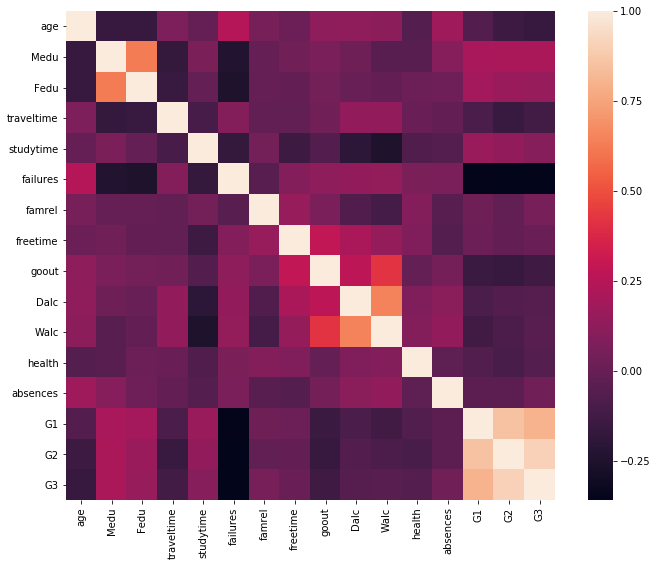

In [28]:
corrmat = stdnt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cbar=True, square=True);
stdnt.fillna(method='bfill',inplace=True)
plt.show()

In [29]:
stdnt_new = pd.DataFrame(stdnt_new.drop(['address'], axis=1))
stdnt_new = pd.get_dummies(stdnt_new)

In [30]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering tree.
import pydotplus
import graphviz

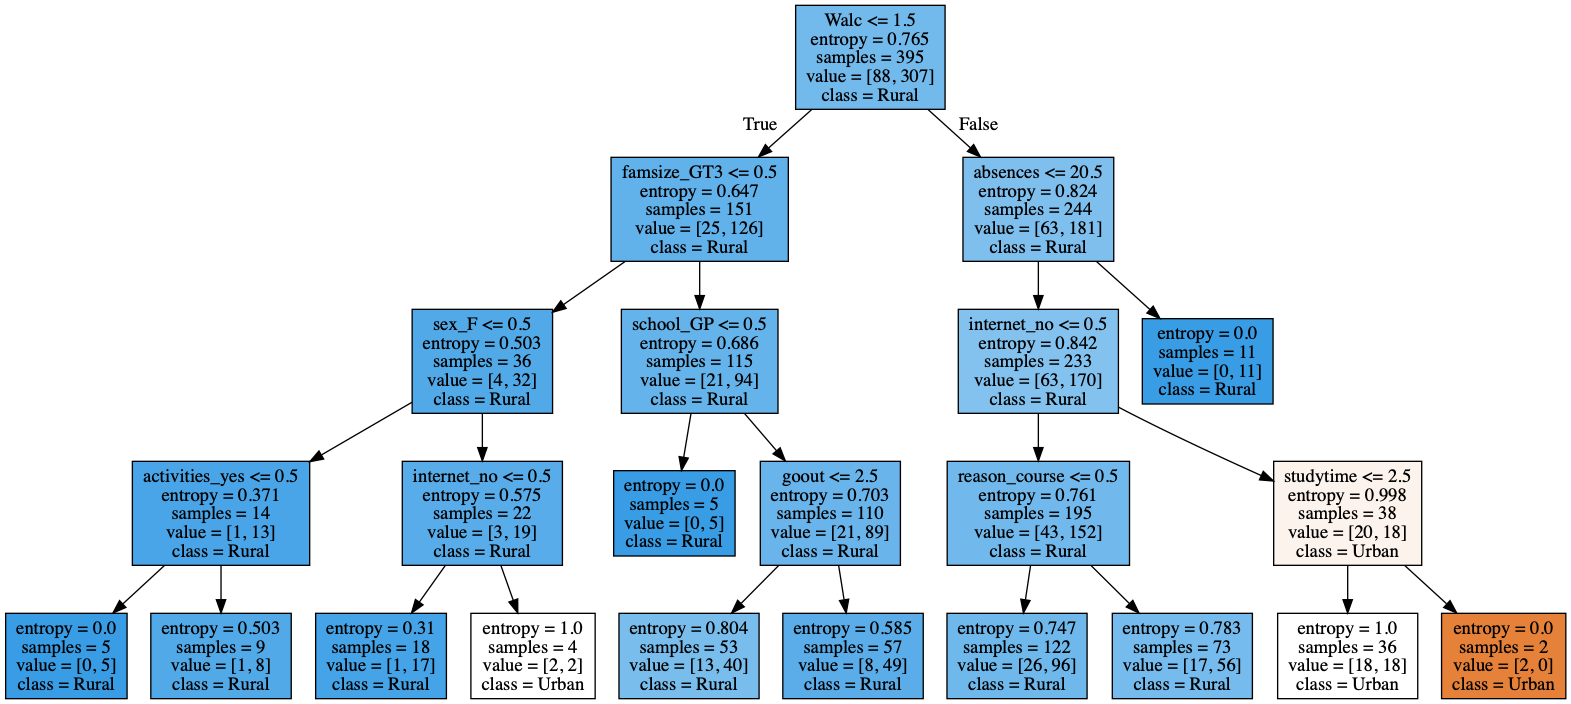

In [31]:
# Initialize and train tree
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features=1, max_depth=4, random_state =42)
decision_tree.fit(stdnt_new, urban)

# Render our tree
stdnt_info = tree.export_graphviz(decision_tree, out_file=None, feature_names=stdnt_new.columns, class_names=['Urban', 'Rural'], filled=True)
graph = pydotplus.graph_from_dot_data(stdnt_info)
Image(graph.create_png())


## Create Random Forest

In [32]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = stdnt_new
Y = urban
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

array([0.75      , 0.65      , 0.8       , 0.725     , 0.7       ,
       0.75      , 0.75      , 0.76923077, 0.81578947, 0.44736842])